# Spark Interface API

In [28]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [29]:
from IPython.display import Image

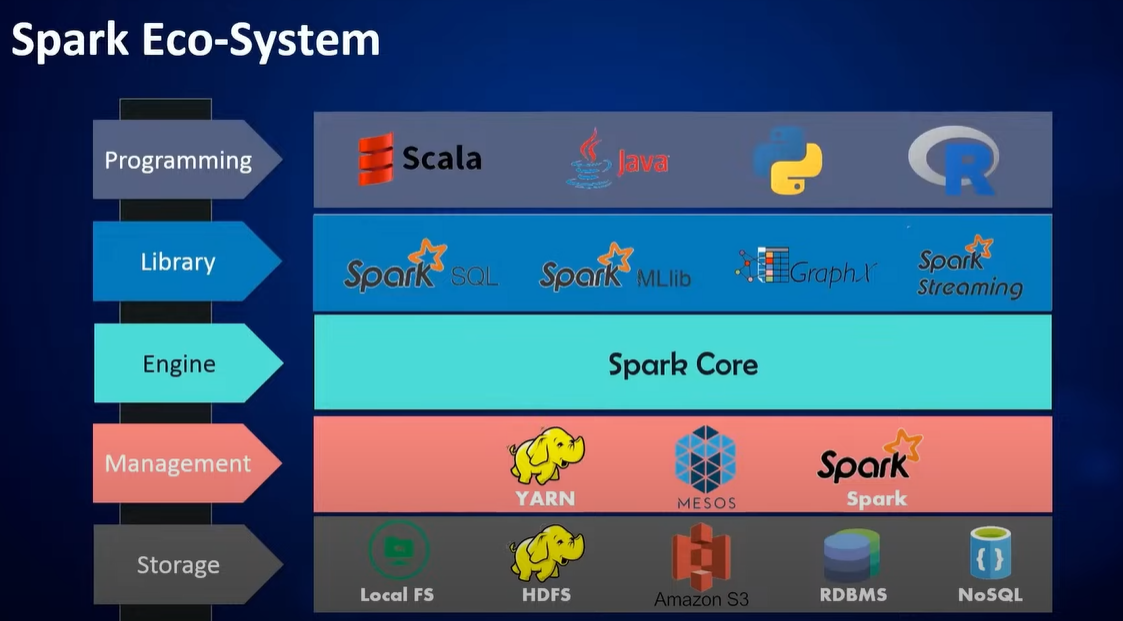

In [84]:
Image(filename='spark_eco_system.png')

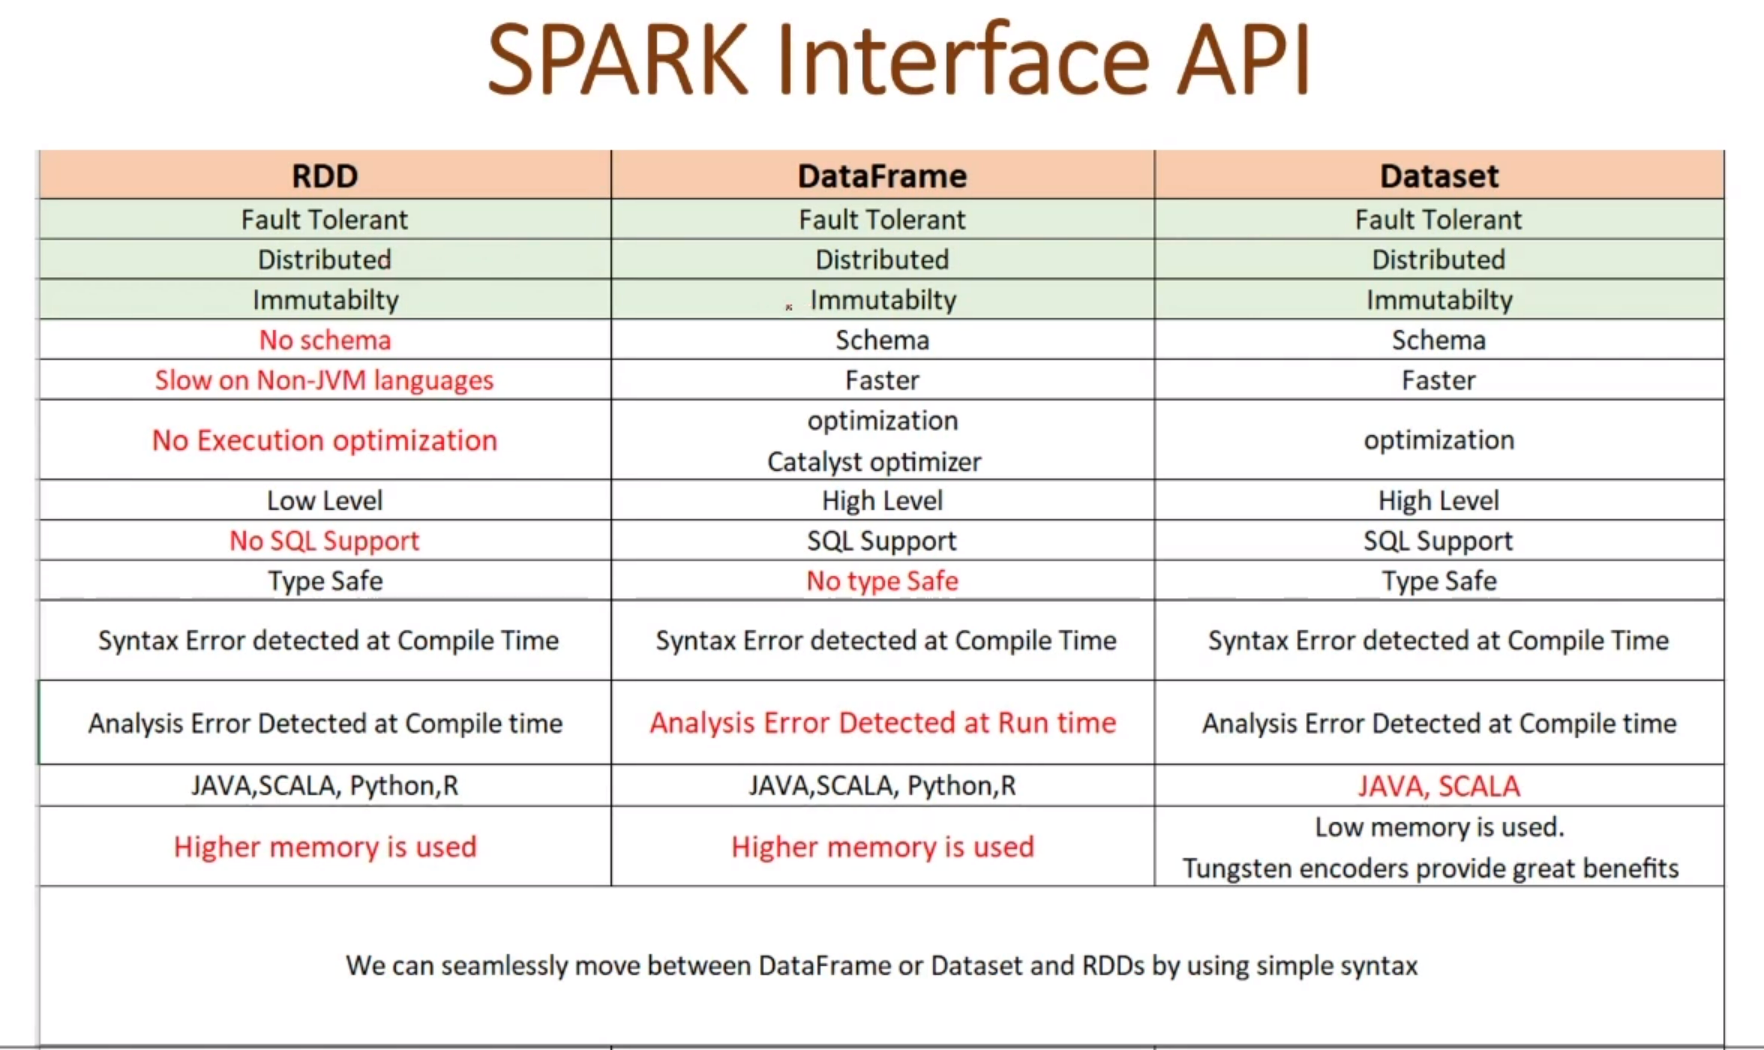

In [30]:
Image(filename='spark_interface_api.png')

# Spark SQL Dataframe

## Import packages

In [31]:
from pyspark import SparkContext,SparkConf

## Setup SparkContext

In [32]:
conf = SparkConf().setAppName('Spark_SQL_DF').setMaster('local')
sc = SparkContext(conf=conf)

## Read Dataset

In [33]:
data = sc.textFile('books.csv')

In [34]:
type(data)

pyspark.rdd.RDD

In [35]:
data.top(1) # headers

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url']

In [27]:
# sc.stop()

In [36]:
data.collect() # All data

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url',
 '1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg',
 '2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher\'s Stone,"Harry Potter and the Sorcerer\'s Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg',
 '3,41865,41865,3212258,226,316

In [37]:
data.take(2) # Only 1st two rows

['id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url',
 '1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg']

In [39]:
for line in data.take(5):
    print(line)

id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
3,41865,41865,3212258,226,316015849,9.7803160

In [40]:
data.first()

'id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url'

In [41]:
oneRecord = data.first()
columns = oneRecord.split(',')
columns

['id',
 'book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [42]:
import pyspark as ps

In [43]:
spark = ps.sql.SparkSession.builder.master('local').appName('FirstApp').getOrCreate()

In [44]:
type(spark)

pyspark.sql.session.SparkSession

In [45]:
books_df = spark.read.csv('books.csv',header=True,inferSchema=True)
books_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [46]:
type(books_df)

pyspark.sql.dataframe.DataFrame

In [47]:
len(books_df.columns)

23

In [48]:
rating_df = spark.read.csv('ratings.csv',header=True,inferSchema=True)
rating_df.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [49]:
type(rating_df)

pyspark.sql.dataframe.DataFrame

In [50]:
len(rating_df.columns)

3

In [51]:
rating_df.count()

981756

In [52]:
rating_df.first()

Row(book_id=1, user_id=314, rating=5)

In [53]:
rating_df.show()

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
|      1|   2077|     4|
|      1|   2487|     4|
|      1|   2900|     5|
|      1|   3662|     4|
|      1|   3922|     5|
|      1|   5379|     5|
|      1|   5461|     3|
|      1|   5885|     5|
|      1|   6630|     5|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  10140|     4|
|      1|  10146|     5|
|      1|  10246|     4|
|      1|  10335|     4|
+-------+-------+------+
only showing top 20 rows



In [54]:
rating_df.show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows



In [55]:
rating_df.head(5)

[Row(book_id=1, user_id=314, rating=5),
 Row(book_id=1, user_id=439, rating=3),
 Row(book_id=1, user_id=588, rating=5),
 Row(book_id=1, user_id=1169, rating=4),
 Row(book_id=1, user_id=1185, rating=4)]

In [57]:
rating_df.select('book_id','rating').show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     5|
|      1|     3|
|      1|     5|
|      1|     4|
|      1|     4|
+-------+------+
only showing top 5 rows



In [58]:
rating_df.filter('rating <=3').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    439|     3|
|      1|   5461|     3|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  20076|     3|
+-------+-------+------+
only showing top 5 rows



In [59]:
rating_df.select("book_id","rating").filter('rating <=3').show(5)

+-------+------+
|book_id|rating|
+-------+------+
|      1|     3|
|      1|     3|
|      1|     3|
|      1|     1|
|      1|     3|
+-------+------+
only showing top 5 rows



In [62]:
unqiue_user_count = rating_df.select('user_id').distinct().count()
unqiue_user_count

53424

In [64]:
book_rating_less_than_three_count = rating_df.filter('rating <= 3').count()
book_rating_less_than_three_count

331429

In [65]:
rating_df.describe('user_id').show()

+-------+------------------+
|summary|           user_id|
+-------+------------------+
|  count|            981756|
|   mean|25616.759933221696|
| stddev| 15228.33882588251|
|    min|                 1|
|    max|             53424|
+-------+------------------+



In [66]:
rating_df.describe('user_id','rating').show()

+-------+------------------+------------------+
|summary|           user_id|            rating|
+-------+------------------+------------------+
|  count|            981756|            981756|
|   mean|25616.759933221696|3.8565335989797873|
| stddev| 15228.33882588251|0.9839408559620116|
|    min|                 1|                 1|
|    max|             53424|                 5|
+-------+------------------+------------------+



In [68]:
# dropDuplicates()
drop_duplicate = rating_df.dropDuplicates()
drop_duplicate.count()

980112

In [69]:
## Drop duplicate row with null value
rating_df_without_null = rating_df.dropna().count()
rating_df_without_null

981756

In [70]:
## Drop a row if it contains any nulls
rating_df.dropna('any').count()

981756

In [71]:
## Drop a row if it contains any nulls
rating_df.dropna('all').count()

981756

In [72]:
# Maximum value of any column
rating_df.agg({'rating':'max'}).show()

+-----------+
|max(rating)|
+-----------+
|          5|
+-----------+



In [73]:
# GroupBy
rating_df.groupBy('rating').count().toPandas()

,rating,count
0,1,19575
1,3,248623
2,5,292961
3,4,357366
4,2,63231


In [74]:
rating_df.groupBy('rating').count().show()

+------+------+
|rating| count|
+------+------+
|     1| 19575|
|     3|248623|
|     5|292961|
|     4|357366|
|     2| 63231|
+------+------+



In [75]:
# Joining two datasets
rating_df.join(books_df,books_df.book_id == rating_df.book_id).select('user_id','title').show(5)

+-------+--------------------+
|user_id|               title|
+-------+--------------------+
|    314|Harry Potter and ...|
|    439|Harry Potter and ...|
|    588|Harry Potter and ...|
|   1169|Harry Potter and ...|
|   1185|Harry Potter and ...|
+-------+--------------------+
only showing top 5 rows



In [77]:
## Order By
rating_df.orderBy('rating').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      2|  13794|     1|
|      3|   9246|     1|
|      2|  17643|     1|
|      1|  51480|     1|
|      2|  48687|     1|
+-------+-------+------+
only showing top 5 rows



In [78]:
rating_df.orderBy(rating_df.rating.desc()).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    588|     5|
|      1|   5885|     5|
|      1|   2900|     5|
|      1|   3922|     5|
+-------+-------+------+
only showing top 5 rows



In [80]:
rating_df.orderBy('rating','book_id').show(200)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|  51480|     1|
|      1|   9246|     1|
|      2|   6063|     1|
|      2|  48687|     1|
|      2|  13794|     1|
|      2|  17643|     1|
|      3|  37284|     1|
|      3|  48687|     1|
|      3|    588|     1|
|      3|  49298|     1|
|      3|  52036|     1|
|      3|  11854|     1|
|      3|  10610|     1|
|      3|  10944|     1|
|      3|   9246|     1|
|      3|  13794|     1|
|      3|  15604|     1|
|      3|   4536|     1|
|      3|  16377|     1|
|      3|  16569|     1|
|      3|  10246|     1|
|      3|  21733|     1|
|      3|  23576|     1|
|      3|  25214|     1|
|      3|  10509|     1|
|      3|  29703|     1|
|      3|  10751|     1|
|      3|  32305|     1|
|      3|  33065|     1|
|      4|   4606|     1|
|      5|   3022|     1|
|      6|  18179|     1|
|      6|  18031|     1|
|      7|  12455|     1|
|      7|  13282|     1|
|      7|  23576|     1|
|      7|  51480|     1|


In [81]:
# Change the value of an existing columns
rating_df.withColumn('rating',rating_df.rating*10).show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|    50|
|      1|    439|    30|
|      1|    588|    50|
|      1|   1169|    40|
|      1|   1185|    40|
+-------+-------+------+
only showing top 5 rows



In [82]:
# Add new column
new_dataset= rating_df.withColumn('rating_ten',rating_df.rating*10)
new_dataset.show(5)

+-------+-------+------+----------+
|book_id|user_id|rating|rating_ten|
+-------+-------+------+----------+
|      1|    314|     5|        50|
|      1|    439|     3|        30|
|      1|    588|     5|        50|
|      1|   1169|     4|        40|
|      1|   1185|     4|        40|
+-------+-------+------+----------+
only showing top 5 rows



In [83]:
# Drop teh column
new_dataset.drop('rating_ten').show(5)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows

